![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 08 - Aprendizaje basado en instancias

En el aprendizaje basado en instancias (Instance Based Learning) los algoritmos memorizan los ejemplos o instancias que han visto en el entrenamiento. Por tanto, la fase de entrenamiento es muy simple, consiste únicamente en almacenar los ejemplos para utilizarlos, posteriormente, en la fase de predicción.

La fase de predicción es la que asume toda la carga computacional, puesto que cuando se le presente un nuevo ejemplo y se le pida que lo clasifique, deberá, de alguna manera, comparar con los ejemplos almacenados y tomará una decisión respecto a la clase a predecir.

## 8.1 K-Nearest Neighbor (KNN)

El algoritmo emblemático de este tipo de sistemas es el conocido como *el vecino más próximo*, *K-Nearest Neighbor* (KNN) y consiste, básicamente, en buscar la instancia más cercana al ejemplo que queremos clasificar de entre las que se han memorizado durante el entrenamiento. La clase que se predecirá para el ejemplo será la misma que tenga su instancia más cercana. 

Normalmente, para evitar situaciones en las que por culpa de una instancia mal situada (ruido) se clasifiquen mal algunos ejemplos, en lugar de utilizar únicamente el vecino más cercano, se seleccionan los `K` vecinos más cercanos y luego se hace una votación entre ellos para decidir la clase a predecir.

Veámoslo con un ejemplo. Para ello vamos a cargar los datos que hay en la pestaña 'ejemplo' del fichero 'ejemplo.xlsx'.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_excel('ejemplo.xlsx', sheet_name='ejemplo')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]
display(X)

# separamos la clase
y = df.iloc[:,(columnas-1)]
display(y)

,x1,x2
0,4,3.0
1,6,2.0
2,6,3.0
3,4,1.0
4,5,2.0
5,9,3.0
6,8,4.5
7,7,2.0
8,9,6.0
9,8,3.0


0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: clase, dtype: int64

Se trata de un conjunto de datos muy simple en el que los ejemplos vienen descritos por dos atributos (x1 y x2) y en el que los 5 primeros ejemplos pertenecen a la clase '0' y los otros 5 a la clase '1'.

Vamos a representarlos utilizando la función `scatter()`:

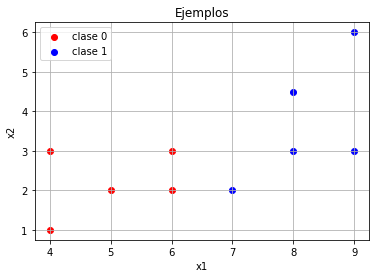

In [4]:
def pinta(X_clase0, X_clase1, texto):
    fig, ax = plt.subplots()
    ax.scatter(X_clase0[:, 0], X_clase0[:, 1], c='r', label='clase 0')
    ax.scatter(X_clase1[:, 0], X_clase1[:, 1], c='b', label='clase 1')
    ax.set_title(texto)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend(loc="best")
    ax.grid(True)
    plt.show()

pinta(X[:5].values, X[5:].values, 'Ejemplos')

Podemos apreciar que en la parte izquierda se sitúan los ejemplos de una clase y en la derecha los de la otra. 

Vamos a ver ahora cómo se crea una instancia de la clase `KNeighborsClassifier()`, donde le indicamos que queremos utilizar los 3 vecinos más cercanos (`n_neighbors=3`) para decidir la clase a predecir. Luego entrenamos el sistema, que lo que hará será simplemente almacenar las instancias del conjunto de entrenamiento: 

In [5]:
# creamos una instancia del KNN para 3 vecinos
knn_sis = KNeighborsClassifier(n_neighbors=3)

# entrenamos el sistema
knn_sis.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

### 8.1.1 Obtener lo vecinos más cercanos
Vamos ahora a ver cuáles son las instancias más cercanas para un nuevo ejemplo que está situado en la posición [7, 3] (x1=7 y x2=3) utilizando el método `kneighbors()`:

In [6]:
nuevo_ejemplo = [7, 3]

# va entre corchetes porque podríamos darle varios ejemplos
nuevo_conjunto = pd.DataFrame(data=[nuevo_ejemplo], columns=['x1', 'x2'])

(distancias, indices) = knn_sis.kneighbors(nuevo_conjunto)

print("####################################")
print("Datos de los 3 vecinos más cercanos:")
# el [0] es porque solo queremos ver el resultado del primer ejemplo (solo hay uno)
print("Distancias:", distancias[0]) 
print("Índices de las instancias:", indices[0])
print("Instancias:")
display(X.iloc[indices[0]])


####################################
Datos de los 3 vecinos más cercanos:
Distancias: [1. 1. 1.]
Índices de las instancias: [9 2 7]
Instancias:


,x1,x2
9,8,3.0
2,6,3.0
7,7,2.0


El método `kneighbors()` devuelve las distancias y los índices de las instancias más cercanas. Utilizando `iloc[]` podemos identificar fácilmente las instancias implicadas y representarlas:

![3 más cercanos](fig_Ejemplos3cercanos.png)

### 8.1.2 Prediciendo la clase y la probabilidad de cada clase

En la imagen vemos representado con un punto verde el nuevo ejemplo y resaltadas las 3 instancias más cercanas.

Vemos que 2 de las 3 instancias más cercanas son de la clase '1', así que al pedir una predicción para este ejemplo, la predicción será '1':


In [7]:
print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict(nuevo_conjunto))

Predicción para [7, 3] : [1]


Algunos algoritmos implementados en el `scikit-learn` son capaces de calcular la probabilidad de pertenencia del ejemplo a cada una de las clases.

Cuando esto es así, se puede utilizar el método `predict_proba()`, que devolverá un vector de probabilidades dadas en el orden indicado por la propiedad `classes_`.

In [8]:
print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict_proba(nuevo_conjunto))
print('Orden de las clases:', knn_sis.classes_)

Predicción para [7, 3] : [[0.33333333 0.66666667]]
Orden de las clases: [0 1]


Pero, ¿qué pasa cuando se produce un empate?. Cuando tras realizar la votación las dos clases reciben el mismo número de votos entoces lo que suele hacer este algoritmo es predecir una de las clases al azar o predecir la primera de ellas según el orden que aparece en `classes_`:

In [9]:
# cambiamos el número de vecinos utilizando 'set_params()'
knn_sis.set_params(n_neighbors=4)
print(knn_sis.get_params())
knn_sis.fit(X, y)

print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict(nuevo_conjunto))
print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict_proba(nuevo_conjunto))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Predicción para [7, 3] : [0]
Predicción para [7, 3] : [[0.5 0.5]]


En lugar de crear un nuevo sistema `KNeighborsClassifier()` con 4 vecinos, lo que hemos hecho es utilizar el método `set_params()` para modificar el número de vecinos que el sistema utilizará para calcular las predicciones.

![4 más cercanos](fig_Ejemplos4cercanos.png)

Con 4 vecinos resulta que 2 son de una clase y 2 de la otra, de tal forma que la probabilidad de que el ejemplo sea de la clase '0' es 0.5 (al igual que de la clase '1').

### 8.1.3 Distancia ponderada

Pero en la figura vemos que no todos los vecinos más próximos están a la misma distancia y esto es algo de lo que se puede sacar provecho si hacemos que el voto de las instancias más cercanas tengan más peso que el de las instancias más lejanas.

Para lograr esto, tenemos que cambiar nuevamente los hiper-parámetros del sistema indicando `weights='distance'`:

In [10]:
# cambiamos a distancia ponderada utilizando 'set_params()'
knn_sis.set_params(weights='distance')
print(knn_sis.get_params())
knn_sis.fit(X, y)

print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict(nuevo_conjunto))
print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict_proba(nuevo_conjunto))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Predicción para [7, 3] : [1]
Predicción para [7, 3] : [[0.46049571 0.53950429]]


Ha cambiado la predicción para ese ejemplo puesto que uno de los 4 vecinos más cercanos está un poco más alejado que los otros 3 y, por tanto, en la votación ponderada gana la clase '1'.

### 8.1.4 La importancia de la distancia

Como se puede apreciar, la distancia tiene suma importancia en este algoritmo y, aunque lo normal es utilizar la distancia euclídea, podrían utilizarse otras distancias utilizando los parámetros `metric` y `p`:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

Como ya comentamos en una práctica anterior, los algoritmos que trabajan con distancias tienen problemas cuando se les presentan conjuntos de datos en los que los atributos están presentados con órdenenes de magnitud diferentes. Para ilustrar este problema vamos a cargar los datos que están en la pestaña 'datos' del fichero 'ejemplo.xlsx':

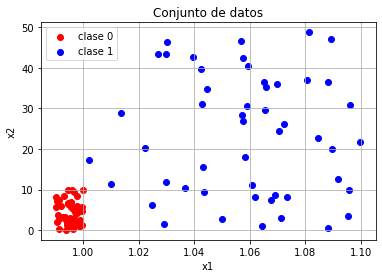

In [11]:
df = pd.read_excel('ejemplo.xlsx', sheet_name='datos')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]

# separamos la clase
y = df.iloc[:,(columnas-1)]

pinta(X[:50].values, X[50:].values, 'Conjunto de datos')

Vemos que el atributo `x1` varía en valores muy cercanos a 1 mientras que el atributo `x2` varía en valores entre 0 y 50. Esto implica que a la hora de calcular las distancias el atributo `x2` tiene mucho más peso que el atributo `x1`.

En la figura vemos que los ejemplos de la clase '0' tienen en `x1` un valor por debajo de 1 y los de la clase '1' un valor mayor de 1. 
Si situásemos un ejemplo en las coordenadas [1.08, 5] vemos que se encontraría claramente situado en la zona de influencia de la clase '1' (parece estar rodeado de ejemplos de la clase '1').

Sin embargo, como los valores en los que se mueve `x1` son muy pequeños con respecto a los que se toman para el atributo `x2` lo que realmente influye en el cálculo de los vecinos más próximos es el atributo `x2`. Se aprecia mejor la problemática que estamos comentando si vemos las instancias representadas en un gráfico en el que ambos ejes presenten la misma escala:

![Misma escala en los dos ejes](fig_Conjunto_de_datos2.png)

Visto de esta manera, ya no está tan claro que un ejemplo en las coordenadas [1.08, 5] sea de la clase '1'. Vamos a ver qué sucede si queremos clasificar ese ejemplo:

In [12]:
# creamos una instancia del KNN
num_vecinos = 5
knn_sis = KNeighborsClassifier(n_neighbors=num_vecinos)

# entrenamos
knn_sis.fit(X, y)

nuevo_ejemplo = [1.08, 5]

# va entre corchetes porque podríamos darle varios ejemplos
nuevo_conjunto = pd.DataFrame(data=[nuevo_ejemplo], columns=['x1', 'x2'])

# obtenemos los vecinos
(distancias, indices) = knn_sis.kneighbors(nuevo_conjunto)

print("Datos de los", num_vecinos, "vecinos más cercanos:")
# el [0] es porque solo queremos ver el resultado del primer ejemplo (solo hay uno)
print("Distancias:", distancias[0]) 
print("Índices de las instancias:", indices[0])
print("Instancias:")
display(X.iloc[indices[0]])
print("Clases de las instancias:")
display(y.iloc[indices[0]])

print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict(nuevo_conjunto))
print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict_proba(nuevo_conjunto))

Datos de los 5 vecinos más cercanos:
Distancias: [0.24714954 0.32403718 0.34634473 0.61954921 0.67204284]
Índices de las instancias: [36 21  8  1 34]
Instancias:


,x1,x2
36,0.996121,5.232481
21,0.997992,4.686512
8,0.999637,4.663108
1,0.997152,4.386015
34,0.990188,5.666015


Clases de las instancias:


36    0
21    0
8     0
1     0
34    0
Name: clase, dtype: int64

Predicción para [1.08, 5] : [0]
Predicción para [1.08, 5] : [[1. 0.]]


Resulta que sus ejemplos más cercanos son todos de la clase '0'. Prueba a ejecutar el código anterior aumentando el número de vecinos y verás que necesitas aumentarlo mucho para empezar a encontrar algún vecino de la clase '1'.

Esta es una consecuencia de que los atributos estén en diferentes escalas.

Calculemos el rendimiento del `KNN` en esta situación:

In [13]:
# vamos a fijar el número de vecinos a 5
knn_sis.set_params(n_neighbors=5)

# entrenamos y evaluamos
knn_sis.fit(X, y)
y_pred = knn_sis.predict(X)

print("Accuracy :", metrics.accuracy_score(y, y_pred))
print("Precision :", metrics.precision_score(y, y_pred)) 
print("Recall :", metrics.recall_score(y, y_pred)) 
print("F1 :", metrics.f1_score(y, y_pred))

Accuracy : 0.87
Precision : 1.0
Recall : 0.74
F1 : 0.8505747126436781


Falla un 13% de los ejemplos, que son principalmente los de la parte baja de la clase '1'.

Vamos ahora a estandarizar los atributos para que se muevan en valores similares:

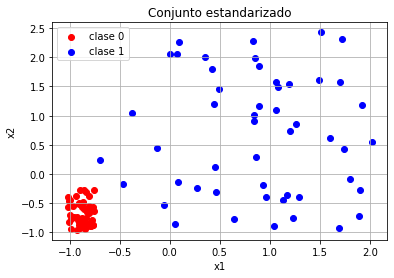

In [14]:
# creamos un StandardScaler
standardizer = StandardScaler()

# entrenamos y trasnformamos los ejemplos de X
X_std = standardizer.fit_transform(X)

pinta(X_std[:50], X_std[50:], 'Conjunto estandarizado')


Vemos que la apariencia es muy semejante a la que teníamos originalmente, pero ahora las escalas de ambos atributos son similares.

Veamos dónde quedaría situado el ejemplo [1.08, 5] tras aplicarle la estandarización:

In [15]:
nuevo_ejemplo = [1.08, 5]

# va entre corchetes porque podríamos darle varios ejemplos
nuevo_conjunto = pd.DataFrame(data=[nuevo_ejemplo], columns=['x1', 'x2'])

# lo estandarizamos
nuevo_conjunto_std = standardizer.transform(nuevo_conjunto)
print(nuevo_conjunto_std)

[[ 1.47098165 -0.61209557]]


Si tratáis de situarlo en el gráfico anterior veréis que, como no podría ser de otra manera, su posición es la que habíamos visto en un principio, estando totalmente rodeado de ejemplos de la clase '1'.

Vamos ahora a entrenar un sistema con estos datos estandarizados y vamos a ver cómo se clasifica este ejemplo:

In [17]:
# creamos una instancia del KNN
num_vecinos = 5
knn_sis = KNeighborsClassifier(n_neighbors=num_vecinos)

# OJO: entrenamos con los datos estandarizados
knn_sis.fit(X_std, y)

# OJO: obtenemos los vecinos del ejemplo estandarizado
(distancias, indices) = knn_sis.kneighbors(nuevo_conjunto_std)

print("Datos de los", num_vecinos, "vecinos más cercanos:")
# el [0] es porque solo queremos ver el resultado del primer ejemplo (solo hay uno)
print("Distancias:", distancias[0]) 
print("Índices de las instancias:", indices[0])
print("Instancias estanzadizadas:")
display(X_std[indices[0]])
print("Clases de las instancias:")
display(y.iloc[indices[0]])

print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict(nuevo_conjunto_std))
print('Predicción para', nuevo_ejemplo, ':', knn_sis.predict_proba(nuevo_conjunto_std))

Datos de los 5 vecinos más cercanos:
Distancias: [0.27893603 0.28180462 0.37986002 0.38029137 0.3882177 ]
Índices de las instancias: [98 52 50 66 69]
Instancias estanzadizadas:


array([[ 1.23317651, -0.75788317],
       [ 1.2912775 , -0.39502355],
       [ 1.13217223, -0.44033466],
       [ 1.69587728, -0.91876067],
       [ 1.17297643, -0.36328666]])

Clases de las instancias:


98    1
52    1
50    1
66    1
69    1
Name: clase, dtype: int64

Predicción para [1.08, 5] : [1]
Predicción para [1.08, 5] : [[0. 1.]]


Como podéis ver, ahora sus vecinos sí son de la clase '1'.

Vamos a ver el rendimiento del `KNN` utilizando el conjunto estandarizado:

In [18]:
# vamos a fijar el número de vecinos a 5
knn_sis.set_params(n_neighbors=5)

# entrenamos y evaluamos utilizando los ejemplos estandarizados X_std
knn_sis.fit(X_std, y)
y_pred = knn_sis.predict(X_std)

print("Accuracy :", metrics.accuracy_score(y, y_pred))
print("Precision :", metrics.precision_score(y, y_pred)) 
print("Recall :", metrics.recall_score(y, y_pred)) 
print("F1 :", metrics.f1_score(y, y_pred))

Accuracy : 0.98
Precision : 1.0
Recall : 0.96
F1 : 0.9795918367346939


Ahora el sistema acierta el 98% de los ejemplos (sin estandarizar se acertaba el 87%).

**¿Quiere esto decir que hay que estandarizar siempre? No.** Esto quiere decir que al realizar transformaciones en el conjunto de datos estaremos modificando la relación de los atributos entre sí. Esto puede resultar beneficioso a veces, pero en otras ocasiones puede ser perjudicial. También depende del algoritmo que estemos utilizando. Acabamos de ver que el k-vecinos es un algoritmo que se puede ver muy afectado (normalmente beneficiado) por una transformación de este tipo, sin embargo, otros algoritmos pueden no verse afectados en absoluto.


### 8.1.5 Creación de `pipelines`

En el código anterior hemos realizado primero un preprocesado de los datos (`X_std = standardizer.fit_transform(X)`) y luego hemos utilizado los datos para entrenar el sistema (`knn_sis.fit(X_std, y)`) y para realizar la predicción (`y_pred = knn_sis.predict(X_std)`).

Ya vimos que si quisiésemos evaluar un nuevo ejemplo, deberíamos primero estandarizarlo (utilizando `transform()` en lugar de `fit_transform()` puesto que el `standarizer` ya se entrenó con el conjunto de datos) y luego realizar la predicción:


In [22]:
nuevo_ejemplo = [1.08, 20]
print('Ejemplo:', nuevo_ejemplo)

# va entre corchetes porque podríamos darle varios ejemplos
nuevo_conjunto = pd.DataFrame(data=[nuevo_ejemplo], columns=['x1', 'x2'])

# lo transformamos (na hay que hacer fit)
ejemplo_estandarizado = standardizer.transform(nuevo_conjunto)
print('Ejemplo estandarizado:', ejemplo_estandarizado)

# realizamos la predicción
prediccion = knn_sis.predict(ejemplo_estandarizado)
print('Clase:', prediccion[0])

Ejemplo: [1.08, 20]
Ejemplo estandarizado: [[1.47098165 0.42996792]]
Clase: 1


Sería más práctico que pudiésemos crear un sistema al que le diésemos los ejemplos sin procesar y él mismo se encargase de procesar los datos y luego realizar el entreniento o la predicción.

Eso podemos lograrlo mediante el uso de `Pipelines`: https://scikit-learn.org/stable/modules/compose.html#pipeline

Vamos a ver cómo se haría en este caso:

In [23]:
# se crea un pipeline que primero estandariza y después enlaza con un KNN
std_knn = Pipeline([('std', StandardScaler()), ('knn', KNeighborsClassifier())])

print('Pasos del pipeline:', std_knn.steps)
print('Acceso mediante índice:', std_knn[0])
print('Acceso mediante nombre:', std_knn['knn'])

Pasos del pipeline: [('std', StandardScaler()), ('knn', KNeighborsClassifier())]
Acceso mediante índice: StandardScaler()
Acceso mediante nombre: KNeighborsClassifier()


Para crear un `pipeline` debemos indicar en un array los pasos que se darán mediante tuplas `('nombre_que_le_damos', algoritmo)`.

En el código hemos creado un `pipeline` con una estandarización que llamamos 'std' y un `KNN` que llamamos 'knn'. Podemos utilizar el campo `steps`, para visualizar los pasos o acceder a ellos mediante índices o el nombre.

También podemos modificar los hiper-parámetros de los algoritmos contenidos en el pipeline. Como hay varios algoritmos implicados, será imprescindible indicarle al método `set_params()` el nombre del algoritmo y el del parámetro que queremos modificar y para ello se sigue la siguiente sintaxis: `nombreAlgoritmo__nombreParámetro`:

In [24]:
# cambiamos el número de vecinos al algoritmo que nombremos como 'knn'
std_knn.set_params(knn__n_neighbors=1)

print('Parámetros:', std_knn.get_params())

Parámetros: {'memory': None, 'steps': [('std', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=1))], 'verbose': False, 'std': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=1), 'std__copy': True, 'std__with_mean': True, 'std__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}


Y ahora ya podemos entrenar y realizar predicciones directamente desde el conjunto `X` que no está estandarizado (ya estandarizará el sistema `std_knn` que hemos creado con un `pipeline`):

In [25]:
# ahora se le pasan los ejemplos sin estandarizar porque ya lo hace él
std_knn.fit(X, y) 

# lo mismo para realizar las predicciones
y_pred = std_knn.predict(X)

print("Accuracy :", metrics.accuracy_score(y, y_pred))
print("Precision :", metrics.precision_score(y, y_pred)) 
print("Recall :", metrics.recall_score(y, y_pred)) 
print("F1 :", metrics.f1_score(y, y_pred))

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 : 1.0


Puede que hayas detectado una limitación a lo que acabamos de ver: **hemos tratado todos los atributos por igual**.

A veces unos atributos necesitarán ser preprocesados de una manera y otros atributos de otra manera. Una caso típico es que los atributos categóricos necesitarán ser transformados mediante una codificación one-hot mientras que los atributos numéricos podrían necesitar una estandarización.

Dedicaremos una práctica a final de curso a ver cómo incluir tranformaciones diferentes de los atributos dentro de un mismo `pipeline`.

### 8.1.6 La importancia del número de vecinos

En el ejemplo anterior, puede llamarnos la atención que se realiza una predicción perfecta: acierta todos los ejemplos cuando ponemos un solo vecino. Está muy bien, pero **tiene truco**: hemos entrenado con el conjunto `X` y hemos realizado la predicción sobre los mismos ejemplos, así que como utilizamos un sólo vecino para predecir, ¡¡el vecino más próximo de cada ejemplo será el propio ejemplo!! Así es imposible fallar ;-)

En la próxima práctica veremos cómo realizar una experimentación de manera correcta (sin truco) para que el rendimiento que obtengamos sea representativo de cómo va a funcionar de bien (o mal) nuestro sistema cuando esté en producción.

Veamos qué pasa cuando modificamos el número de vecinos:

In [27]:
for i in range(1,6):
    print("\n#####################################################")
    print("#### n_neighbors =", i)
   
    std_knn.set_params(knn__n_neighbors=i)
    std_knn.fit(X, y)
    y_pred = std_knn.predict(X)
    
    print("Accuracy :", metrics.accuracy_score(y, y_pred))
    print("(P=%.2f ,R=%.2f ,F1=%.2f)" % (metrics.precision_score(y, y_pred), metrics.recall_score(y, y_pred), metrics.f1_score(y, y_pred))) 



#####################################################
#### n_neighbors = 1
Accuracy : 1.0
(P=1.00 ,R=1.00 ,F1=1.00)

#####################################################
#### n_neighbors = 2
Accuracy : 0.99
(P=1.00 ,R=0.98 ,F1=0.99)

#####################################################
#### n_neighbors = 3
Accuracy : 0.99
(P=1.00 ,R=0.98 ,F1=0.99)

#####################################################
#### n_neighbors = 4
Accuracy : 0.98
(P=1.00 ,R=0.96 ,F1=0.98)

#####################################################
#### n_neighbors = 5
Accuracy : 0.98
(P=1.00 ,R=0.96 ,F1=0.98)


Vemos que los resultados varían. 

**No existe un número de vecinos mágico que funcione mejor en todas las situaciones y con todos los conjuntos.**

El número de vecinos es un **hiperparámetro** del algoritmo, es decir, es un mecanismo que tenemos para hacer funcionar al algoritmo de forma ligeramente diferente y que tendremos que ajustar nosotros. Veremos cómo se ajusta en una sesión de prácticas posterior.

## Ejercicios

1. Carga el fichero **ILPD.data** (es un archivo de texto). 
2. Convierte los atributos categóricos y asigna valores a los missing si los hay.
3. Calcula el error con el baseline de "la clase más frecuente".
4. Calcula la accuracy para un K-vecinos (KNN) variando el número de vecinos desde 1 hasta 10.
5. Crea un pipeline estandarizando y con un k-vecinos y calcula la accuracy variando el número de vecinos desde 1 hasta 10.
6. Representa en una gráfica la evolución de la accuracy en función del número de vecinos.

Estos ejercicios no es necesario entregarlos.